In [12]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Data preprocessing
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob

# Deep learning
from keras import backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D,GlobalAveragePooling2D, Conv3D, MaxPooling3D,GlobalAveragePooling3D
from tensorflow.keras.layers import Activation, Dropout, BatchNormalization, Flatten, Dense, AvgPool2D,MaxPool2D
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
import tensorflow as tf 
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.preprocessing import image
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [2]:
img_size = (224,224)
dir_name = 'ProcessedData/Covid'
img_list = glob.glob(dir_name + '/*')

list_covid = []
for img in img_list:
    temp_img = load_img(img,color_mode = "grayscale",target_size=(img_size))
    temp_img_array = img_to_array(temp_img) /255
    list_covid.append(temp_img_array)
list_covid = np.array(list_covid)
list_covid2 = list_covid.reshape(-1,50176)
df_covid=pd.DataFrame(list_covid2)
df_covid['label'] = np.full(df_covid.shape[0],2)

In [3]:
img_size = (224,224)
dir_name = 'ProcessedData/LungOpacity'
img_list = glob.glob(dir_name + '/*')

list_LungOpacity = []
for img in img_list:
    temp_img = load_img(img,color_mode = "grayscale",target_size=(img_size))
    temp_img_array = img_to_array(temp_img) /255
    list_LungOpacity.append(temp_img_array)
list_LungOpacity = np.array(list_LungOpacity)
list_LungOpacity2 = list_LungOpacity.reshape(-1,50176)
df_LungOpacity=pd.DataFrame(list_LungOpacity2)
df_LungOpacity['label'] = np.full(df_LungOpacity.shape[0],2)

In [4]:
img_size = (224,224)
dir_name = 'ProcessedData/Normal'
img_list = glob.glob(dir_name + '/*')

list_Normal = []
for img in img_list:
    temp_img = load_img(img,color_mode = "grayscale",target_size=(img_size))
    temp_img_array = img_to_array(temp_img) /255
    list_Normal.append(temp_img_array)
list_Normal = np.array(list_Normal)
list_Normal2 = list_Normal.reshape(-1,50176)
df_Normal=pd.DataFrame(list_Normal2)
df_Normal['label'] = np.full(df_Normal.shape[0],2)

In [5]:
img_size = (224,224)
dir_name = 'ProcessedData/ViralPneumonia'
img_list = glob.glob(dir_name + '/*')

list_ViralPneumonia = []
for img in img_list:
    temp_img = load_img(img,color_mode = "grayscale",target_size=(img_size))
    temp_img_array = img_to_array(temp_img) /255
    list_ViralPneumonia.append(temp_img_array)
list_ViralPneumonia = np.array(list_ViralPneumonia)
list_ViralPneumonia2 = list_ViralPneumonia.reshape(-1,50176)
df_ViralPneumonia=pd.DataFrame(list_ViralPneumonia2)
df_ViralPneumonia['label'] = np.full(df_ViralPneumonia.shape[0],2)

In [6]:
Df = pd.concat([df_covid, df_LungOpacity, df_Normal, df_ViralPneumonia], ignore_index=True)

In [13]:
from tensorflow.keras.utils import to_categorical
x_train, x_test, y_train, y_test = train_test_split(Df.iloc[:,0:-1], Df.iloc[:,-1], test_size=0.20, random_state=None)

X_train = x_train.values.reshape(-1,224,224,1)
X_test = x_test.values.reshape(-1,224,224,1)
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)

In [7]:
model = Sequential()

model.add(BatchNormalization(input_shape=(224,224,1)))
model.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.35))

model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.35))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.35))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
model_chkpt = ModelCheckpoint('best_mod.h5', monitor='accuracy')
early_stopping = EarlyStopping(monitor='loss', restore_best_weights=False, patience=10)

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 224, 224, 1)      4         
 ormalization)                                                   
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 64)      640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                        

In [ ]:
history = model.fit(X_train, Y_train, 
          validation_split=0.20,
          epochs=20, batch_size=32, shuffle=True, 
          callbacks=[model_chkpt ,early_stopping]
         )

Epoch 1/20
255/424 [=================>............] - ETA: 7:05 - loss: 0.0040 - accuracy: 0.9982

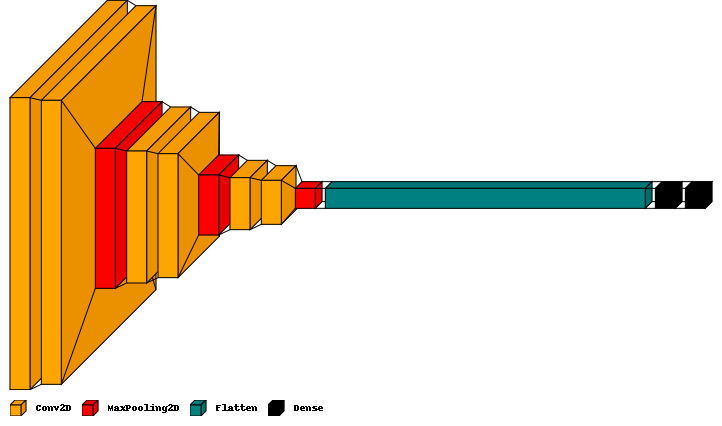

In [11]:
import visualkeras
from collections import defaultdict
from tensorflow.keras import layers
color_map = defaultdict(dict)
color_map[layers.Conv2D]['fill'] = 'orange'
color_map[layers.MaxPooling2D]['fill'] = 'red'
color_map[layers.Dense]['fill'] = 'black'
color_map[layers.Flatten]['fill'] = 'teal'
visualkeras.layered_view(modelo1, legend=True,color_map=color_map ) 

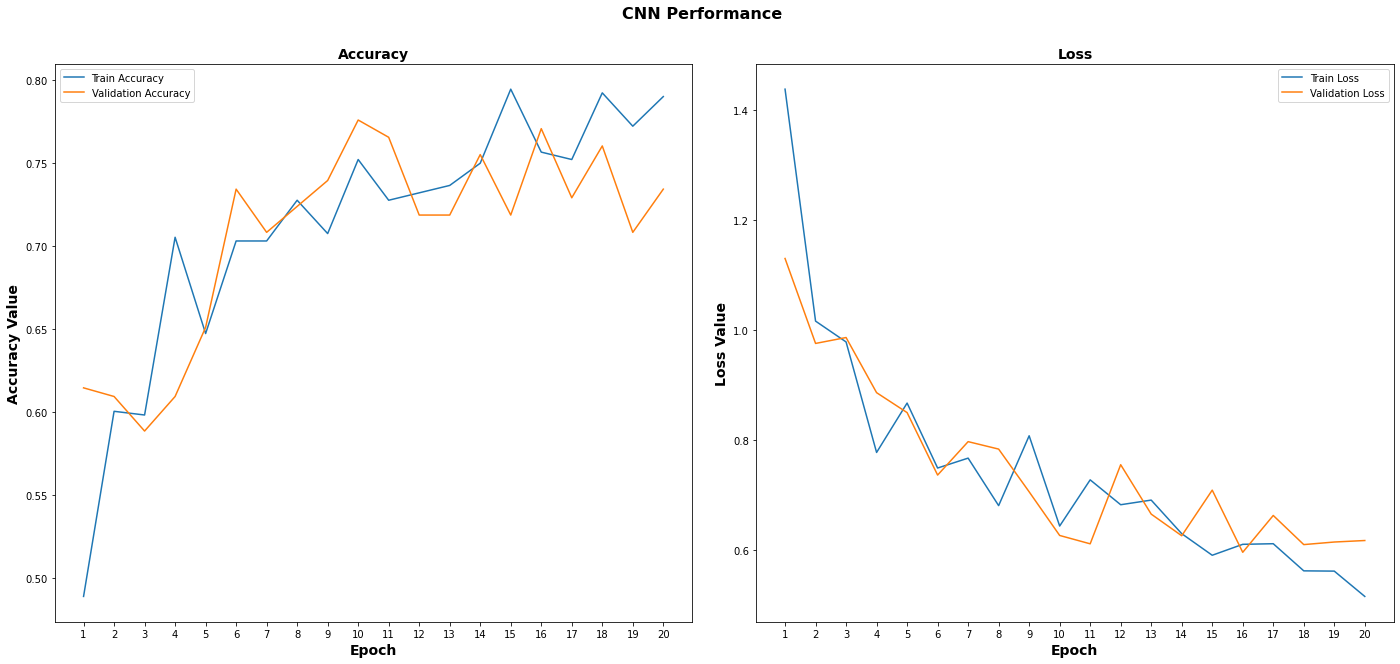

In [7]:
from sklearn.metrics import accuracy_score
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 10))
t = f.suptitle('Fast-CovNet Performance', fontsize=16,fontweight='bold')
f.subplots_adjust(top=0.9, wspace=0.1)

max_epoch = len(history.history['accuracy'])+1
epoch_list = list(range(1,max_epoch))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(1, max_epoch, 1))
ax1.set_ylabel('Accuracy Value',fontsize=14,fontweight='bold')
ax1.set_xlabel('Epoch',fontsize=14,fontweight='bold')
ax1.set_title('Accuracy', fontsize=14,fontweight='bold')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(1, max_epoch, 1))
ax2.set_ylabel('Loss Value',fontsize=14,fontweight='bold')
ax2.set_xlabel('Epoch',fontsize=14,fontweight='bold')
ax2.set_title('Loss',fontsize=14,fontweight='bold')
l2 = ax2.legend(loc="best")